використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на Kaggle.com. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline



books = pd.read_csv("bestsellers with categories.csv")

Виведіть перші п'ять рядків (використовується функція head)

In [4]:
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [5]:
books.shape

(550, 7)

In [6]:
print(f"Про скільки книг зберігає дані датасет? Відповідь: - {books['Name'].unique().shape[0]}")

Про скільки книг зберігає дані датасет? Відповідь: - 351


Для спрощення подальшої роботи давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить пробіл. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на малий, а пробіл замінимо на нижнє підкреслення (snake_style).

In [7]:
books.rename(
    columns={
        "Name": "name",
        "Author": "author",
        "User Rating": "user_rating",
        "Reviews": "reviews",
        "Price": "price",
        "Year": "year",
        "Genre": "genre",
    },
    inplace=True,
)
books

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [8]:
missing_data = books.isna().sum(axis=0)
missing_data

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Відповідь: Чи є в якихось змінних пропуски? (Так / ні)   - Ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [9]:
books.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Відповідь: Які є унікальні жанри?         - 'Non Fiction', 'Fiction'

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

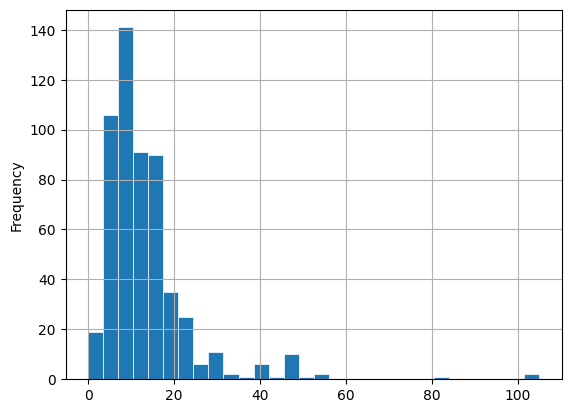

In [10]:
fig, ax = plt.subplots()
ax = books.price.plot(kind='hist', bins=30, linewidth=0.5, edgecolor="white", grid=True)

plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [11]:
print(f"Максимальна ціна? Відповідь: {books.price.max()}")
print(f"Мінімальна ціна? Відповідь: {books.price.min()}")
print(f"Середня ціна? Відповідь: {books.price.mean()}")
print(f"Медіанна ціна? Відповідь: {books.price.median()}")

Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0


## Пошук та сортування даних

In [12]:
print(f"Який рейтинг у датасеті найвищий? Відповідь:- {books.user_rating.max()}")

Який рейтинг у датасеті найвищий? Відповідь:- 4.9


In [13]:
print(f"Скільки книг мають такий рейтинг? Відповідь:- {books.name[books.user_rating == books.user_rating.max()].unique().shape[0]}")

Скільки книг мають такий рейтинг? Відповідь:- 28


In [14]:
print(f'Яка книга має найбільше відгуків? Відповідь:\n{books[books.reviews == books.reviews.max()]}')

Яка книга має найбільше відгуків? Відповідь:
                        name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [15]:
top_50_in_2015 = books[books.year == 2015]
more_expensive_book = top_50_in_2015[top_50_in_2015.price == top_50_in_2015.price.max()]
print(f"Відповідь:\n{more_expensive_book}")

Відповідь:
                                                  name  \
277  Publication Manual of the American Psychologic...   

                                 author  user_rating  reviews  price  year  \
277  American Psychological Association          4.5     8580     46  2015   

           genre  
277  Non Fiction  


Cкільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [16]:
cnt = books.name[(books.year == 2010) & (books.genre == 'Fiction')].count()
print(f"Відповідь: {cnt} книг")

Відповідь: 20 книг


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 

In [17]:
list_book = books[(books.user_rating == 4.9) & (books.year == 2010 | 2011)]
print(f"Відповідь: {list_book.name.count()} книг. \n{list_book}")

Відповідь: 1 книг. 
                                                  name       author  \
187  Jesus Calling: Enjoying Peace in His Presence ...  Sarah Young   

     user_rating  reviews  price  year        genre  
187          4.9    19576      8  2011  Non Fiction  


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values)

In [18]:
top_50_in_2015 = books[(books.year == 2015) & (books.price < 8)]
top_50_in_2015 = top_50_in_2015.sort_values('price', ascending=False)
print(f"Яка книга остання у відсортованому списку? Відповідь:\n{top_50_in_2015.iloc[-1]}")

Яка книга остання у відсортованому списку? Відповідь:
name           To Kill a Mockingbird
author                    Harper Lee
user_rating                      4.8
reviews                        26234
price                              0
year                            2015
genre                        Fiction
Name: 507, dtype: object


## Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [19]:
result = books.groupby("genre", as_index=False).agg({"price": ["min", "max"]})
result

genre price     
                 min  max
0      Fiction     0   82
1  Non Fiction     0  105

In [20]:
print(f"Максимальна ціна для жанру Fiction: Відповідь {result.loc[0]['price']['max']}")
print(f"Мінімальна ціна для жанру Fiction: Відповідь {result.loc[0]['price']['min']}")
print(f"Максимальна ціна для жанру Non Fiction: Відповідь {result.loc[1]['price']['max']}")
print(f"Мінімальна ціна для жанру Non Fiction: Відповідь {result.loc[1]['price']['min']}")

Максимальна ціна для жанру Fiction: Відповідь 82
Мінімальна ціна для жанру Fiction: Відповідь 0
Максимальна ціна для жанру Non Fiction: Відповідь 105
Мінімальна ціна для жанру Non Fiction: Відповідь 0


Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [21]:
result_1 = books.groupby("author", as_index=False)\
 .agg(number_of_book = ('author', 'count'))\
 .sort_values('number_of_book')

result_1

,author,number_of_book
123,Jill Twiss,1
178,Patrick Thorpe,1
109,Ian K. Smith M.D.,1
108,Howard Stern,1
107,Hopscotch Girls,1
...,...,...
11,American Psychological Association,10
226,Suzanne Collins,11
92,Gary Chapman,11
197,Rick Riordan,11


In [22]:
print(f"Якої розмірності вийшла таблиця? Відповідь: {result_1.shape}")
print(f"Який автор має найбільше книг? Відповідь: {result_1.author.iloc[-1]}")
print(f"Скільки книг цього автора? Відповідь: {result_1.number_of_book.iloc[-1]}")

Якої розмірності вийшла таблиця? Відповідь: (248, 2)
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [23]:
result_2 = books.groupby("author", as_index=False)\
    .agg(avg_rating = ("user_rating", "mean"))\
    .sort_values("avg_rating")
result_2

,author,avg_rating
71,Donna Tartt,3.9
100,Gillian Flynn,4.0
171,Muriel Barbery,4.0
90,Gallup,4.0
109,Ian K. Smith M.D.,4.1
...,...,...
146,Lin-Manuel Miranda,4.9
178,Patrick Thorpe,4.9
173,Nathan W. Pyle,4.9
26,Bill Martin Jr.,4.9


In [24]:
print(f"У якого автора середній рейтинг мінімальний? Відповідь: {result_2.author.iloc[0]}")
print(f"Який у цього автора середній рейтинг? Відповідь: {result_2.avg_rating.iloc[0]}")

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Який у цього автора середній рейтинг? Відповідь: 3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [25]:
df = pd.concat([result_1, result_2.avg_rating], axis=1, )
df

,author,number_of_book,avg_rating
123,Jill Twiss,1,4.900000
178,Patrick Thorpe,1,4.900000
109,Ian K. Smith M.D.,1,4.100000
108,Howard Stern,1,4.300000
107,Hopscotch Girls,1,4.800000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [26]:
df.sort_values(['number_of_book', 'avg_rating'], ascending=False, inplace=True)
df

,author,number_of_book,avg_rating
120,Jeff Kinney,12,4.800000
197,Rick Riordan,11,4.772727
92,Gary Chapman,11,4.736364
226,Suzanne Collins,11,4.663636
11,American Psychological Association,10,4.500000
...,...,...,...
167,Michael Wolff,1,4.200000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
43,Chris Cleave,1,4.100000


In [58]:
print(f"Який автор перший у списку? Відповідь: {df.author.iloc[0]}")


Який автор перший у списку? Відповідь: Jeff Kinney


## Візуалізація

додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.



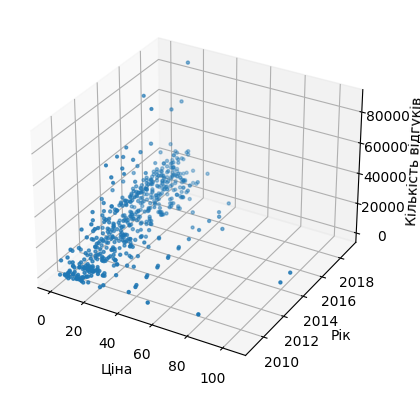

In [59]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.scatter(books.price, 
           books.year, 
           books.reviews, 
           s= books.user_rating)

ax.set_xlabel('Ціна')
ax.set_ylabel('Рік')
ax.set_zlabel('Кількість відгуків')
plt.show()


Text(0.5, 1.0, 'Розподіл книг по жанрам в ТОП-50')

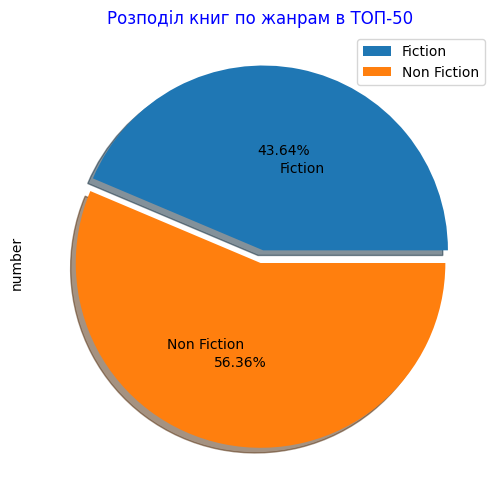

In [81]:
genres = books.groupby('genre')\
    .agg(number = ('name' , 'count'))\
    .plot.pie(y='number', 
              figsize=(6, 6), 
              legend=True,
              shadow=True,
              explode=[0.07, 0],
              autopct="%.2f%%",
              pctdistance=0.55,
              labeldistance=0.45,
              )
plt.title("Розподіл книг по жанрам в ТОП-50", color = 'b')